In [14]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# B1.0 Relevance ZERO SHOT

## Notebook to evaluate GPT-annotate results - HLS speeches for relevance

Codebooks:
- B1.0: zero shot
- B1.1: one shot
- B1.0.1: zero shot with specific inclusion of context
- B1.1.1: one shot with specific inclusion of context

Test for 5 different seeds [3644,3441, 280, 5991, 7917]
> Refer to these as S1-5

Batch of 20 sentences
1 Iteration.

Main outcomes: T0 - I1
For testing purposes: (T 0.6 I1 - T 0 I3)

FINGERPRINT USED: fp_43dfabdef1


In [2]:
# Basic stats of train dataset:
HLS_train = pd.read_csv('data/string/HLS_train_string.csv')

In [5]:
HLS_train

,id,Text,Relevance,Principle,Topic,Unit,Shape,RELEVANCE,PRINCIPLE,TOPIC,UNIT,SHAPE
0,COP19_japan,"Thank you, Mr. President .",0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
1,COP19_japan,"On beha lf of the government of Japan , I wou...",0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
2,COP19_japan,I would also like to expr ess my d eepest con...,0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
3,COP19_japan,Mr. President: A fair and effective framewor...,2,3,1,2,2,Relevant,utilitarian,new UNFCCC policy,responsibility,equality
4,COP19_japan,"In this regard, Japan firmly supports the est...",1,0,0,0,0,Statement of intent,not evaluated,not evaluated,not evaluated,not evaluated
...,...,...,...,...,...,...,...,...,...,...,...,...
1207,COP28_newzealand,New Zealand is proud to suppor t several impo...,0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
1208,COP28_newzealand,"I am joined by New Zealand’s largest business,...",0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
1209,COP28_newzealand,The commitment o f New Zealanders from across ...,0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
1210,COP28_newzealand,Thank you Mr President.,0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated


# 1. Results B1.0

### 1. Import Results
Results created under the same fingerprint are saved in a CSV file for each seed. All results are combined into one dataset.

In [58]:
#B1.0
path_B1 = 'STRING_RESULT/B1.0/all_iterations'

# Open all dataframes
S1 = pd.read_csv(f'{path_B1}/all_iterations_string_T0_3644.csv')
S2 = pd.read_csv(f'{path_B1}/all_iterations_string_T0_3441.csv')
S3 = pd.read_csv(f'{path_B1}/all_iterations_string_T0_280.csv')
S4 = pd.read_csv(f'{path_B1}/all_iterations_string_T0_5991.csv')
S5 = pd.read_csv(f'{path_B1}/all_iterations_string_T0_7917.csv')

seeds_B1 = {
    "S1": [S1],
    "S2": [S2],
    "S3": [S3],
    "S4": [S4],
    "S5": [S5]
}

### 2. Evaluate missed batches

In [13]:
# Evaluate missed batches
B1_missed = pd.read_csv('STRING_RESULT/B1.0/T0I1_missed_batches.csv')
B1_missed

,Unnamed: 0,Missed batch
0,0,3644 - I1 - B22
1,1,3644 - I1 - B30
2,2,3644 - I1 - B32
3,3,3441 - I1 - B28
4,4,3441 - I1 - B37
5,5,3441 - I1 - B60
6,6,280 - I1 - B1
7,7,280 - I1 - B4
8,8,280 - I1 - B5
9,9,280 - I1 - B7


S1: 2 batches missed
S2: 3 batches missed
S3: 5 batches missed
S4: 1 batch missed
S5: 0 batches missed

The fact that batches are missed must be taken into account when evaluating accuracy and performance.

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [52]:
print(classification_report(S1['RELEVANCE_x'],S1['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.50      0.65       744
           Relevant       0.32      0.83      0.47       205
Statement of intent       0.46      0.50      0.48       203

           accuracy                           0.56      1152
          macro avg       0.57      0.61      0.53      1152
       weighted avg       0.74      0.56      0.59      1152



In [18]:
print(classification_report(S2['RELEVANCE_x'],S2['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.95      0.57      0.71       754
           Relevant       0.37      0.82      0.51       211
Statement of intent       0.46      0.56      0.50       187

           accuracy                           0.61      1152
          macro avg       0.59      0.65      0.57      1152
       weighted avg       0.76      0.61      0.64      1152



In [19]:
print(classification_report(S3['RELEVANCE_x'],S3['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.56      0.70       722
           Relevant       0.34      0.82      0.48       191
Statement of intent       0.48      0.54      0.51       199

           accuracy                           0.60      1112
          macro avg       0.59      0.64      0.56      1112
       weighted avg       0.76      0.60      0.63      1112



In [70]:
print(classification_report(S4['RELEVANCE_x'],S4['RELEVANCE_y']))


                     precision    recall  f1-score   support

       Not relevant       0.94      0.56      0.70       772
           Relevant       0.35      0.79      0.48       215
Statement of intent       0.46      0.55      0.50       205

           accuracy                           0.60      1192
          macro avg       0.58      0.63      0.56      1192
       weighted avg       0.75      0.60      0.63      1192



In [21]:
print(classification_report(S5['RELEVANCE_x'],S5['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.55      0.70       786
           Relevant       0.35      0.81      0.49       218
Statement of intent       0.45      0.53      0.49       208

           accuracy                           0.60      1212
          macro avg       0.58      0.63      0.56      1212
       weighted avg       0.75      0.60      0.62      1212



Metrics over 5 seeds are very similar.
Macro avg: average of all classes (aka labels)
Weighted avg: weighted average, taking class balances into account.

In [76]:
# Assuming S1, S2, S3, S4, and S5 are your dataframes
dataframes = [S1, S2, S3, S4, S5]
report_dfs = []

# Generate a classification report for each dataframe and convert it to a dataframe
for i, df in enumerate(dataframes):
    report = classification_report(df['RELEVANCE_x'], df['RELEVANCE_y'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['source'] = f"S{i+1}"  # Add a source column to identify the original dataframe
    report_dfs.append(report_df)

# Concatenate all classification report dataframes
all_reports_df = pd.concat(report_dfs).reset_index()

# Calculate the mean and standard deviation for each metric, excluding the support column
metrics = all_reports_df.columns.difference(['index', 'source', 'support'])
mean_df = all_reports_df[metrics].groupby(all_reports_df['index']).mean()
std_df = all_reports_df[metrics].groupby(all_reports_df['index']).std()

# Print the results
print("Mean of each metric:")
print(mean_df)
print("\nStandard Deviation of each metric:")
print(std_df)

Mean of each metric:
                     f1-score  precision    recall
index                                             
Not relevant         0.706131   0.944256  0.563947
Relevant             0.488929   0.350857  0.806654
Statement of intent  0.498008   0.461483  0.541031
accuracy             0.603499   0.603499  0.603499
macro avg            0.564356   0.585532  0.637211
weighted avg         0.631830   0.755808  0.603499

Standard Deviation of each metric:
                     f1-score  precision    recall
index                                             
Not relevant         0.009230   0.005093  0.010005
Relevant             0.009558   0.009648  0.012612
Statement of intent  0.008497   0.010930  0.012121
accuracy             0.007707   0.007707  0.007707
macro avg            0.005987   0.003925  0.006512
weighted avg         0.007605   0.005276  0.007707


In [77]:
print(mean_df)

                     f1-score  precision    recall
index                                             
Not relevant         0.706131   0.944256  0.563947
Relevant             0.488929   0.350857  0.806654
Statement of intent  0.498008   0.461483  0.541031
accuracy             0.603499   0.603499  0.603499
macro avg            0.564356   0.585532  0.637211
weighted avg         0.631830   0.755808  0.603499


## 3. Confusion matrix
Evaluate where misclassifications are found - Again for each seed.

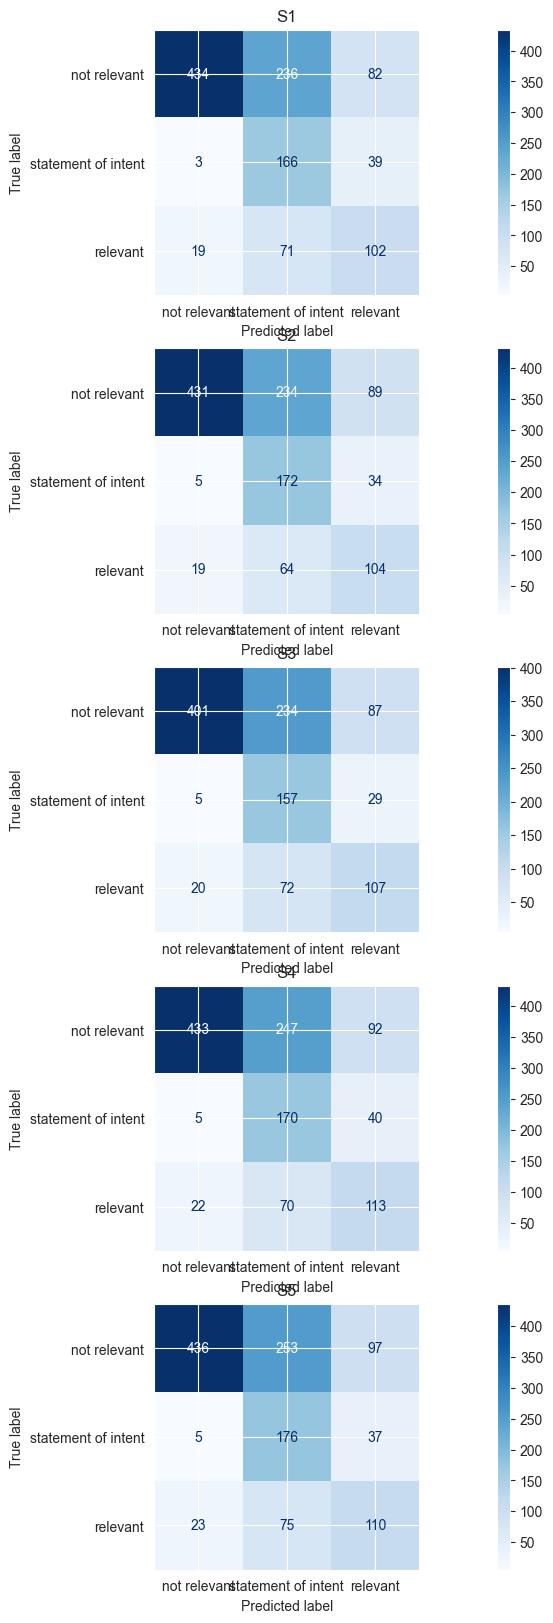

In [60]:
labels = ['not relevant', 'statement of intent', 'relevant']

# Number of plots
num_plots = len(seeds_B1)
# Create plot names
plot_names = list(seeds_B1.keys())

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 20))

# Visualize the confusion matrix
for i, name in enumerate(plot_names):
    df = seeds_B1[name][0]  # Access the dataframe
    cm = confusion_matrix(df['RELEVANCE_x'], df['RELEVANCE_y'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, ax=axes[i])
    axes[i].set_title(name)

# Adjust layout
plt.tight_layout()
plt.show()

## 4. Evaluate misclassifications of sentences
Special interest in relevant sentences that are incorrectly classified. Evaluate if the same sentences are misclassified in each seed

# 2. Results B1.0.1 - zero shot with context

In [61]:
#B1.0
path_B101 = 'STRING_RESULT/B1.0.1/all_iterations'

# Open all dataframes
S1_101 = pd.read_csv(f'{path_B101}/all_iterations_string_T0_3644.csv')
S2_101 = pd.read_csv(f'{path_B101}/all_iterations_string_T0_3441.csv')
S3_101 = pd.read_csv(f'{path_B101}/all_iterations_string_T0_280.csv')
S4_101 = pd.read_csv(f'{path_B101}/all_iterations_string_T0_5991.csv')
S5_101 = pd.read_csv(f'{path_B101}/all_iterations_string_T0_7917.csv')

seeds_B101 = {
    "S1": [S1_101],
    "S2": [S2_101],
    "S3": [S3_101],
    "S4": [S4_101],
    "S5": [S5_101]
}

### 2. Evaluate missed batches

In [64]:
# Evaluate missed batches
B101_missed = pd.read_csv('STRING_RESULT/B1.0.1/T0_missed_batches.csv')
B101_missed

,Unnamed: 0,Missed batch
0,0,3644 - I1 - B39
1,1,3644 - I1 - B42
2,2,3644 - I1 - B57
3,3,3441 - I1 - B3
4,4,3441 - I1 - B59
5,5,280 - I1 - B12
6,6,280 - I1 - B33
7,7,280 - I1 - B46
8,8,280 - I1 - B56
9,9,5991 - I1 - B61


S1: 2 batches (40 sentences) missed
S2: 2 batches (40 sentences) missed
S3: 4 batches (80 sentences) missed
S4: 1 batch (20 sentences) missed
S5: 4 batches (80 sentences) missed

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [65]:
print(classification_report(S1_101['RELEVANCE_x'],S1_101['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.50      0.65       744
           Relevant       0.32      0.83      0.47       205
Statement of intent       0.46      0.50      0.48       203

           accuracy                           0.56      1152
          macro avg       0.57      0.61      0.53      1152
       weighted avg       0.74      0.56      0.59      1152



In [66]:
print(classification_report(S2_101['RELEVANCE_x'],S2_101['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.93      0.48      0.63       759
           Relevant       0.31      0.80      0.45       209
Statement of intent       0.45      0.54      0.49       204

           accuracy                           0.55      1172
          macro avg       0.57      0.61      0.53      1172
       weighted avg       0.74      0.55      0.58      1172



In [67]:
print(classification_report(S3_101['RELEVANCE_x'],S3_101['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.50      0.66       733
           Relevant       0.32      0.81      0.46       205
Statement of intent       0.44      0.51      0.47       194

           accuracy                           0.56      1132
          macro avg       0.57      0.61      0.53      1132
       weighted avg       0.74      0.56      0.59      1132



In [68]:
print(classification_report(S4_101['RELEVANCE_x'],S4_101['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.51      0.66       776
           Relevant       0.33      0.82      0.47       217
Statement of intent       0.46      0.53      0.50       207

           accuracy                           0.57      1200
          macro avg       0.58      0.62      0.54      1200
       weighted avg       0.75      0.57      0.60      1200



In [69]:
print(classification_report(S5_101['RELEVANCE_x'],S5_101['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.50      0.66       733
           Relevant       0.33      0.82      0.47       206
Statement of intent       0.46      0.54      0.49       193

           accuracy                           0.57      1132
          macro avg       0.58      0.62      0.54      1132
       weighted avg       0.75      0.57      0.60      1132



In [72]:
# Assuming S1, S2, S3, S4, and S5 are your dataframes
dataframes = [S1_101, S2_101, S3_101, S4_101, S5_101]
report_dfs = []

# Generate a classification report for each dataframe and convert it to a dataframe
for i, df in enumerate(dataframes):
    report = classification_report(df['RELEVANCE_x'], df['RELEVANCE_y'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['source'] = f"S{i+1}"  # Add a source column to identify the original dataframe
    report_dfs.append(report_df)

# Concatenate all classification report dataframes
all_reports_df = pd.concat(report_dfs).reset_index()

# Calculate the mean and standard deviation for each metric, excluding the support column
metrics = all_reports_df.columns.difference(['index', 'source', 'support'])
mean_df = all_reports_df[metrics].groupby(all_reports_df['index']).mean()
std_df = all_reports_df[metrics].groupby(all_reports_df['index']).std()

# Print the results
print("Mean of each metric:")
print(mean_df)
print("\nStandard Deviation of each metric:")
print(std_df)

Mean of each metric:
                     f1-score  precision    recall
index                                             
Not relevant         0.653493   0.938058  0.501462
Relevant             0.464743   0.324504  0.818619
Statement of intent  0.486358   0.453691  0.524399
accuracy             0.562515   0.562515  0.562515
macro avg            0.534865   0.572084  0.614827
weighted avg         0.590613   0.743850  0.562515

Standard Deviation of each metric:
                     f1-score  precision    recall
index                                             
Not relevant         0.011161   0.004050  0.012329
Relevant             0.009941   0.008237  0.013063
Statement of intent  0.011584   0.010205  0.019355
accuracy             0.009263   0.009263  0.009263
macro avg            0.007826   0.005235  0.007260
weighted avg         0.008856   0.003425  0.009263


In [74]:
print(mean_df)

                     f1-score  precision    recall
index                                             
Not relevant         0.653493   0.938058  0.501462
Relevant             0.464743   0.324504  0.818619
Statement of intent  0.486358   0.453691  0.524399
accuracy             0.562515   0.562515  0.562515
macro avg            0.534865   0.572084  0.614827
weighted avg         0.590613   0.743850  0.562515
